<a href="https://colab.research.google.com/github/dratul/ImageFilters/blob/main/Image_Processing_14_Edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Edge detection techniques

## Edges
Edges are significant local changes of intensity in a digital image. An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions. There are three types of edges:

1. Horizontal edges
2. Vertical edges
3. Diagonal edges

In [ ]:
#loading All dependencies
import numpy as np
import pandas as pd
import cv2 as cv
#from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import imageio
from scipy.fftpack import fftn, ifftn, fftshift
from skimage.restoration import inpaint
#Mounting Google Drive to read files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

## Edge Detection
Edge Detection is a method of segmenting an image into regions of discontinuity. It is a widely used technique in digital image processing like
1. pattern recognition
2. image morphology
3. feature extraction

Edge detection allows users to observe the features of an image for a significant change in the gray level. This texture indicating the end of one region in the image and the beginning of another. It reduces the amount of data in an image and preserves the structural properties of an image.

## Edge Detection Operators
Edge Detection Operators are of two types:

**Gradient based operator** which computes first-order derivations in a digital image like, Sobel operator, Prewitt operator, Robert operator.

**Gaussian based operator** which computes second-order derivations in a digital image like, Canny edge detector, Laplacian of Gaussian


## Sobel Filter
 It is a discrete difference based filter. It computes the gradient approximation of image intensity function for image edge detection. At the pixels of an image, the Sobel filter produces either the normal to a vector or the corresponding gradient vector. It uses two 3 x 3 kernels or masks which are convolved with the input image to calculate the vertical and horizontal derivative approximations respectively


$M_x=\left[\begin{array}{ccc}
-1 & 0 &1\\
-2 & 0 & 2\\
-1& 0 & 1
\end{array}\right]$
$M_y=\left[\begin{array}{ccc}
-1 & -2 &-1\\
0 & 0 & 0\\
1 & 2 & 1
\end{array}\right]$


**Advantages**
1. Simple and time efficient computation
2. Very easy at searching for smooth edges
**Disadvantages**
1. Diagonal direction points are not preserved always
2. Highly sensitive to noise
3. Not very accurate in edge detection
4. Detect with thick and rough edges does not give appropriate results


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


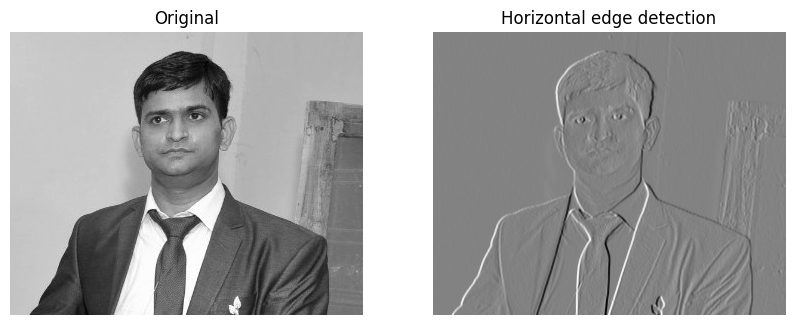

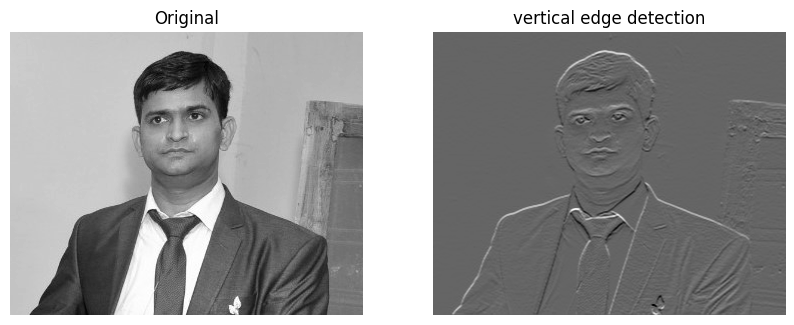

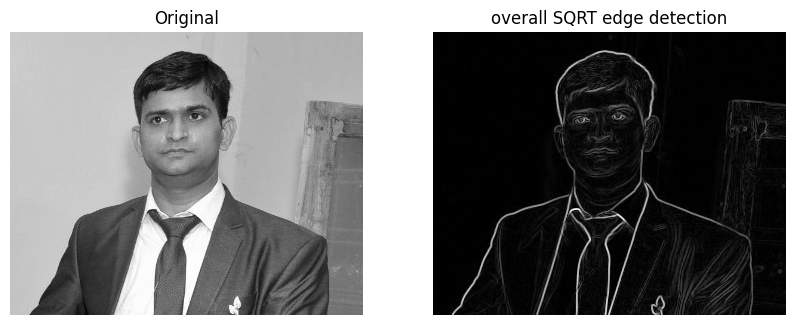

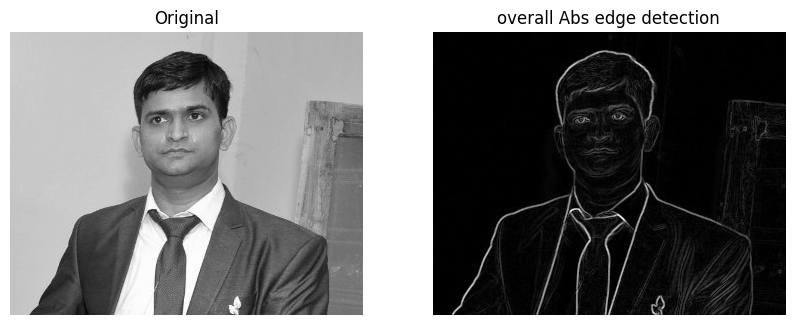

In [ ]:
from scipy.signal import convolve2d
# Reading the color image in grayscale image
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/atul.jpg', cv.IMREAD_GRAYSCALE)
# Prepare the Filter Kernel
a1 = np.matrix([1, 2, 1])
a2 = np.matrix([-1, 0, 1])
Kx = a1.T * a2
print(Kx)
Ky = a2.T * a1

# Sobel Filter
Gx = convolve2d(img, Kx, "same", "symm")
# Show the original and resulting image
plot_comparison(img, Gx, 'Horizontal edge detection')
Gy = convolve2d(img, Ky, "same", "symm")
# Show the original and resulting image
plot_comparison(img, Gy, 'vertical edge detection')
G = np.sqrt(Gx**2 + Gy**2)
# Show the original and resulting image
plot_comparison(img, G, 'overall SQRT edge detection')
# or using the absolute values
G = np.abs(Gx) + np.abs(Gy)
plot_comparison(img, G, 'overall Abs edge detection')

## Previtt Filter
This Filter is almost similar to the sobel Filter. It also detects vertical and horizontal edges of an image. It is one of the best ways to detect the orientation and magnitude of an image. It uses the kernels or masks

$M_x=\left[\begin{array}{ccc}
-1 & 0 &1\\
-1 & 0 & 1\\
-1& 0 & 1
\end{array}\right]$

$M_y=\left[\begin{array}{ccc}
-1 & -1 &-1\\
0 & 0 & 0\\
1 & 1 & 1
\end{array}\right]$

*Advantages:*
* Good performance on detecting vertical and horizontal edges
* Best operator to detect the orientation of an image

*Limitations:*
* The magnitude of coefficient is fixed and cannot be changed
* Diagonal direction points are not preserved always

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


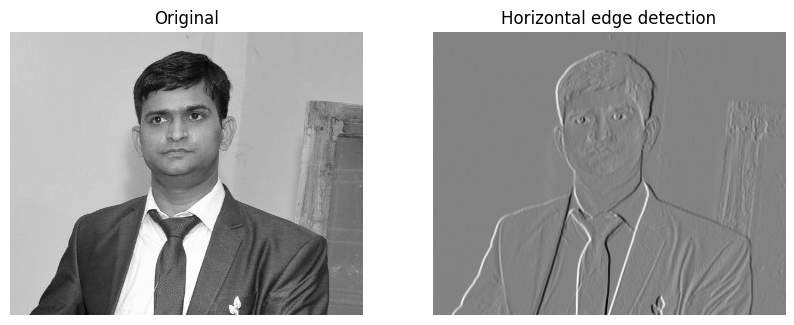

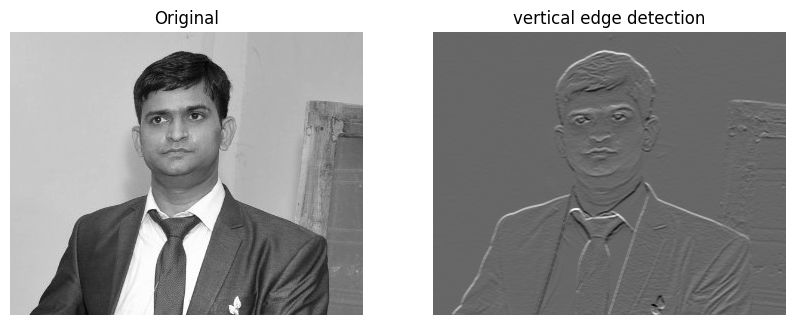

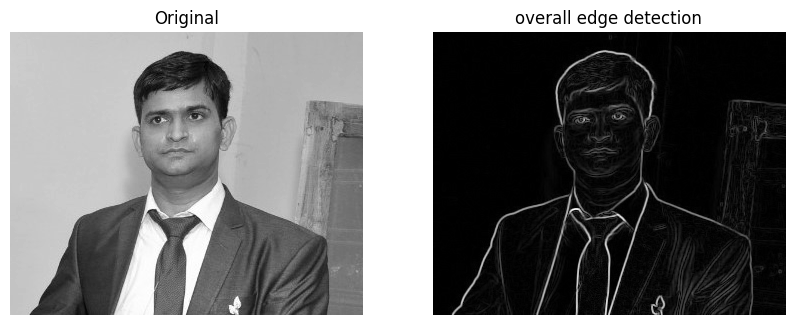

In [ ]:
# Prepare the kernels
a1 = np.matrix([1, 1, 1])
a2 = np.matrix([-1, 0, 1])
Kx = a1.T * a2
print(Kx)
Ky = a2.T * a1

# Previtt Filter
Gx = convolve2d(img, Kx, "same", "symm")
# Show the original and resulting image
plot_comparison(img, Gx, 'Horizontal edge detection')
Gy = convolve2d(img, Ky, "same", "symm")
# Show the original and resulting image
plot_comparison(img, Gy, 'vertical edge detection')
G = np.sqrt(Gx**2 + Gy**2)
# Show the original and resulting image
plot_comparison(img, G, 'overall edge detection')
# or using the absolute values
G = np.abs(Gx) + np.abs(Gy)

## Robert Operator
This gradient-based operator computes the sum of squares of the differences between diagonally adjacent pixels in an image through discrete differentiation. Then the gradient approximation is made. It uses the following 2 x 2 kernels or masks

$M_x=\left[\begin{array}{ccc}
-1 & 0 \\
0 & -1
\end{array}\right]$

$M_y=\left[\begin{array}{ccc}
0 & 1 \\
-1 & 0\\
\end{array}\right]$

*Advantages:*
* Detection of edges and orientation are very easy
* Diagonal direction points are preserved

*Limitations:*
* Very sensitive to noise
* Not very accurate in edge detection

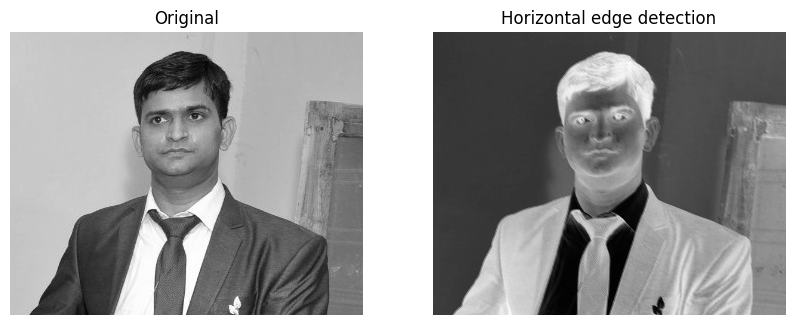

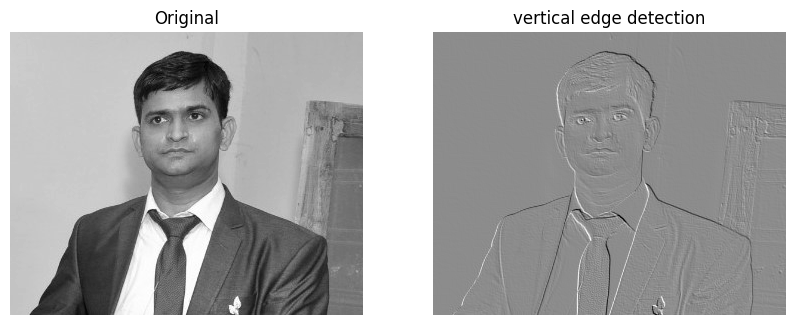

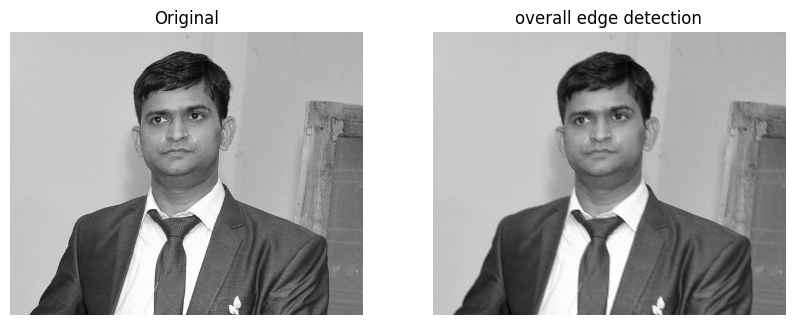

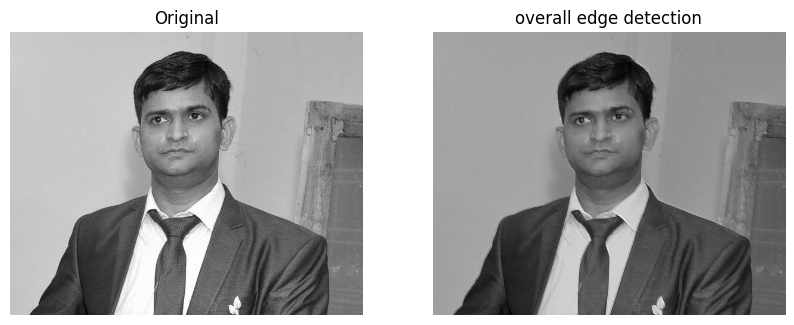

In [ ]:
#Coefficients of Robert Filter
Kx = np.matrix([[-1, 0],[ 0, -1]])
Ky = np.matrix([[0, 1],[ -1, 0]])
# Convolution for Robert Filter
Gx = convolve2d(img, Kx, "same", "symm")
# Show the original and resulting image
plot_comparison(img, Gx, 'Horizontal edge detection')
Gy = convolve2d(img, Ky, "same", "symm")
# Show the original and resulting image
plot_comparison(img, Gy, 'vertical edge detection')
G = np.sqrt(Gx**2 + Gy**2)
# Show the original and resulting image
plot_comparison(img, G, 'overall edge detection')
# or using the absolute values
Gn = np.abs(Gx) + np.abs(Gy)
# Show the original and resulting image
plot_comparison(img, Gn, 'overall edge detection')

## Laplacian Filter
The Laplacian of an image highlights the areas of rapid changes in intensity and can thus be used for edge detection. If we let I(x,y) represent the intensities of an image then the Laplacian of the image is given by the following formula:

$ L(x,y)=\frac{\partial^2 I}{\partial x^2} +\frac{\partial^2 I}{\partial y^2} $

The discrete approximation of the Laplacian at a specific pixel can be determined by taking the weighted mean of the pixel intensities in a small neighborhood of the pixel.


<Figure size 1100x600 with 0 Axes>

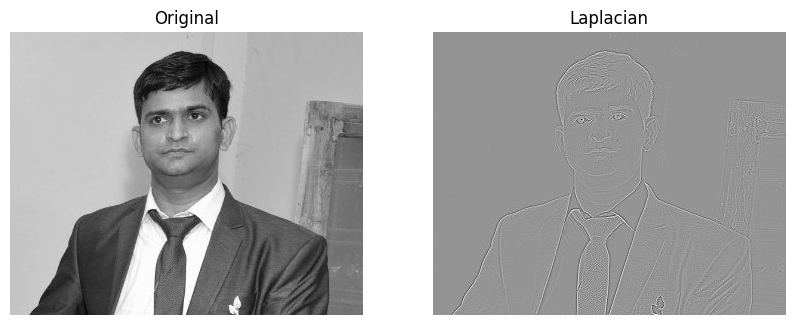

In [ ]:
new_image = cv.Laplacian(img,cv.CV_64F)
plt.figure(figsize=(11,6))
plot_comparison(img, new_image, 'Laplacian')

### Zero Crossing Detector
Zero crossing detector uses second order derivative.As we are not interested in the values, only in sign change, then proceed to pad the last column and rows with zeroes, for the convolution. Then we proceed to check along the x-axis if there is a crossing from - => +. Just change the comparison to change for the other way around. The idea to check three states in a row can be done similarly where the comparison has to evaluate to True in order to be 1

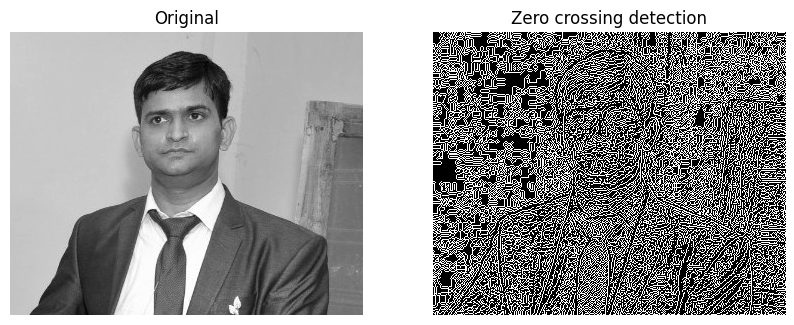

In [ ]:
from skimage.filters import laplace

lap = np.sign(laplace(img))
lap = np.pad(lap, ((0, 1), (0, 1)))
diff_x = lap[:-1, :-1] - lap[:-1, 1:] < 0
diff_y = lap[:-1, :-1] - lap[1:, :-1] < 0

edges =  np.logical_or(diff_x, diff_y).astype(float)
# Show the original and resulting image
plot_comparison(img, edges, 'Zero crossing detection')

## Laplacian of Gaussian (LoG) or Marr-Hildreth Operator
It is a gaussian-based operator which uses the Laplacian to take the second derivative of an image. This really works well when the transition of the grey level seems to be abrupt. It works on the zero-crossing method i.e when the second-order derivative crosses zero, then that particular location corresponds to a maximum level. It is called an edge location. Here the Gaussian operator reduces the noise and the Laplacian operator detects the sharp edges.
The Gaussian function is defined by the formula:

$ G(x,y)=\frac{1}{\sigma \sqrt{2\pi \sigma^2}} e^{-(\frac{x^2+y^2}{2\sigma})}$

And the LoG operator is computed from
$$ LOG = {∂^2 \over ∂x^2} G(x,y) + {∂ \over ∂x} G(x,y) = \frac{x^2+y^2-2\sigma^2}{\sigma^4} e^{-(\frac{x^2+y^2}{2\sigma})}$$

Advantages:

Easy to detect edges and their various orientations

There is fixed characteristics in all directions

Limitations:

Very sensitive to noise

The localization error may be severe at curved edges
It generates noisy responses that do not correspond to edges, so-called “false edges”




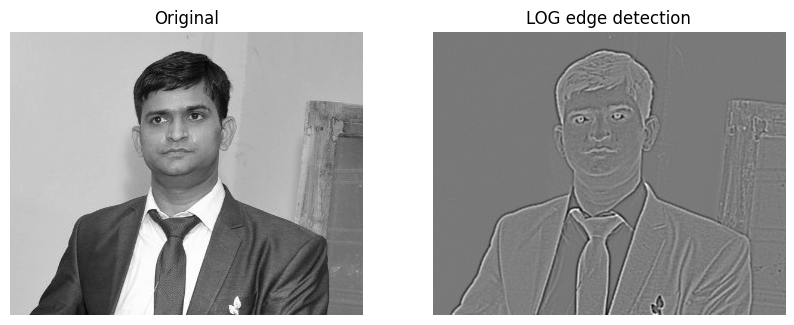

In [ ]:
#applying log 2nd derivative edge detection to create the kernel
def log_2nd_derivative(sigma = 1):
    #using the size 7
    size = int(2*(np.ceil(3*sigma))+1)
    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                       np.arange(-size/2+1, size/2+1))

    # using G(x,y) = e^(-(x^2+y^2)/2σ^2)/(2πσ^2)*(x^2+y^2-σ^2)/σ^4
    normal = 1 / (2.0 * np.pi * sigma**2)
    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
        np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal
    return kernel

k = log_2nd_derivative()

# Apply the LOG operator
G = convolve2d(img, k, "same", "symm")
# Show the original and resulting image
plot_comparison(img, G, 'LOG edge detection')

## Canny Edge Detection
The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection explaining why the technique works.
The Canny edge detection algorithm is composed of 5 steps:

1. Noise reduction;
2. Gradient calculation;
3. Non-maximum suppression;
4. Double thresholding;
5. Edge Tracking by Hysteresis.

the algorithm is based on grayscale pictures. Therefore,  image need to be converted to grayscale before following the above-mentioned steps.

### Canny Step-1 Noise Reduction
Since the mathematics involved behind the scene are mainly based on derivatives (cf. Step 2: Gradient calculation), edge detection results are highly sensitive to image noise.

One way to get rid of the noise on the image, is by applying Gaussian blur to smooth it. To do so, image convolution technique is applied with a Gaussian Kernel (3x3, 5x5, 7x7 etc…). The kernel size depends on the expected blurring effect. Basically, the smallest the kernel, the less visible is the blur. In our example, we will use a 5 by 5 Gaussian kernel.

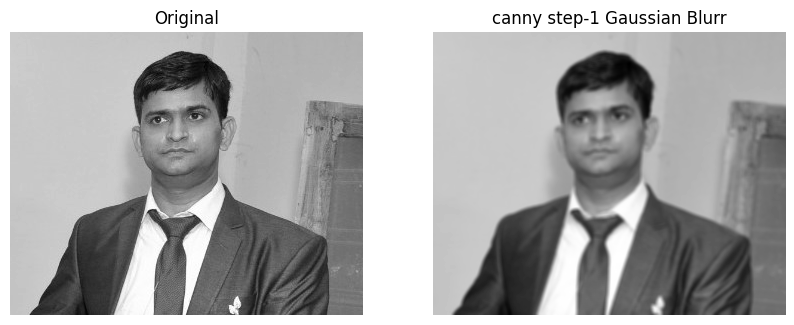

In [ ]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

k = gaussian_kernel(5,2)

# Apply the Gausssian operator
G = convolve2d(img, k, "same", "symm")
# Show the original and resulting image
plot_comparison(img, G, 'canny step-1 Gaussian Blurr')

### Step 2 Gradient Calculation
The Gradient calculation step detects the edge intensity and direction by calculating the gradient of the image using edge detection operators.

Edges correspond to a change of pixels’ intensity. To detect it, the easiest way is to apply filters that highlight this intensity change in both directions: horizontal (x) and vertical (y)

When the image is smoothed, the derivatives Ix and Iy w.r.t. x and y are calculated. It can be implemented by convolving I with Sobel kernels Kx and Ky, respectively. then magnitude G and the slope θ of the gradient are calculated as follow:

$$ |G|= \sqrt{I_x^2+I_y^2}$$
$$ Θ= \tan^{-1}{(I_y/I_x)}$$
Below is how the Sobel filters are applied to the image, and how to get both intensity and edge direction matrices:



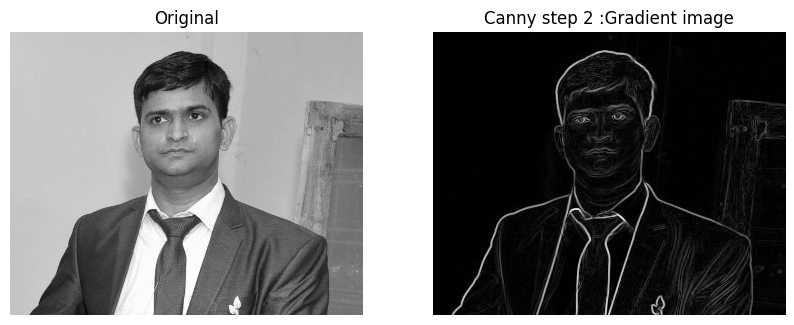

In [ ]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = convolve2d(img, Kx, "same", "symm")
    Iy = convolve2d(img, Ky, "same", "symm")
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return (G, theta)
G,theta=sobel_filters(img)
# Show the original and resulting image
plot_comparison(img, G, 'Canny step 2 :Gradient image')

The result is almost the expected one, but we can see that some of the edges are thick and others are thin. Non-Max Suppression step will help us mitigate the thick ones.

Moreover, the gradient intensity level is between 0 and 255 which is not uniform. The edges on the final result should have the same intensity (i-e. white pixel = 255).

### Canny step 3 ✈Non-Maximum Suppression
Ideally, the final image should have thin edges. Thus, we must perform non-maximum suppression to thin out the edges.

The principle is simple: the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.
 Each pixel has 2 main criteria (edge direction in radians, and pixel intensity (between 0–255)). Based on these inputs the non-max-suppression steps are:

* Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;
* Identify the edge direction based on the angle value from the angle matrix;
* Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
* Return the image processed with the non-max suppression algorithm.


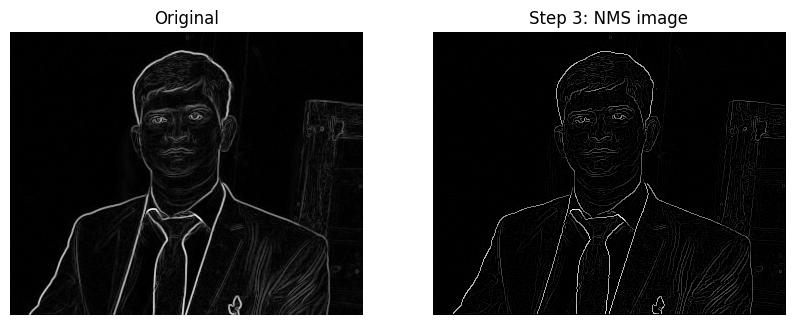

In [ ]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180


    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255

               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass

    return Z

G_nms=non_max_suppression(G,theta)
# Show the original and resulting image
plot_comparison(G, G_nms, 'Step 3: NMS image')

The result is the same image with thinner edges. We can however still notice some variation regarding the edges’ intensity: some pixels seem to be brighter than others, and we will try to cover this shortcoming with the two final steps.

### Canny Step 4 : Double Threshold
The double threshold step aims at identifying 3 kinds of pixels: strong, weak, and non-relevant:

* Strong pixels are pixels that have an intensity so high that we are sure they contribute to the final edge.
* Weak pixels are pixels that have an intensity value that is not enough to be considered as strong ones, but yet not small enough to be considered as non-relevant for the edge detection.
*Other pixels are considered as non-relevant for the edge.

Now you can see what the double thresholds holds for:

* High threshold is used to identify the strong pixels ( intensity higher than the high threshold)
* Low threshold is used to identify the non-relevant pixels (intensity lower than the low threshold)
* All pixels having intensity between both thresholds are flagged as weak and the Hysteresis mechanism (next step) will help us identify the ones that could be considered as strong and the ones that are considered as non-relevant.

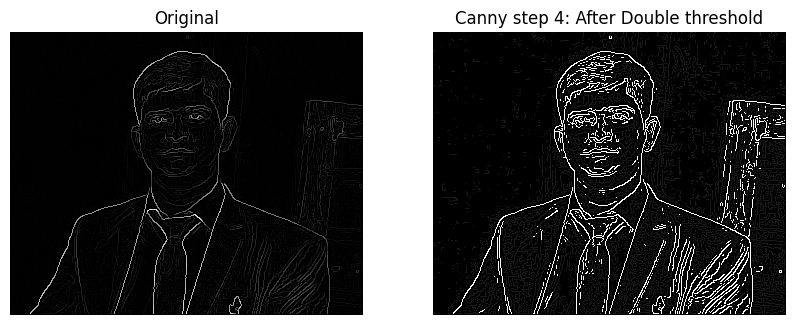

In [ ]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):

    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res, weak, strong)

G_dt,w,s=threshold(G_nms)
# Show the original and resulting image
plot_comparison(G_nms, G_dt, 'Canny step 4: After Double threshold')

the Hysteresis mechanism (next step) will help us identify the ones that could be considered as strong and the ones that are considered as non-relevant.

### Hysterisis
Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one, as described below:

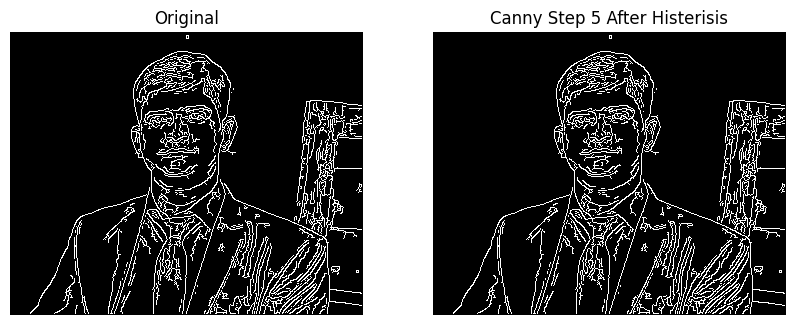

In [ ]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img
G_h=hysteresis(G_dt,w,s)
# Show the original and resulting image
plot_comparison(G_dt, G_h, 'Canny Step 5 After Histerisis')

## References
1.
https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
2.
https://www.geeksforgeeks.org/implement-canny-edge-detector-in-python-using-opencv/
3.

